In [63]:
import os
import sys
sys.path.insert(0, "../")
import pandas as pd
import numpy as np
import data_processing.utils as utils
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")



### Loading Data

In [7]:
TEST_PATH = os.path.join(os.path.dirname(os.getcwd()), 'data_processing/test_files/')
FIG_PATH = os.path.join(os.path.dirname(os.getcwd()), 'figures/nearest_neighbor_verification/')
PARTITION_SUBGRADES = "partition_subgrades_30000.csv"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 160)

In [8]:
cat_vars_of_interest = ["term", "grade", "sub_grade", "emp_title", "emp_length", "home_ownership", "verification_status", "purpose", "addr_state", 
    "initial_list_status", "application_type", "hardship_flag", "loan_status"
]
num_vars_of_interest = list(set([
    "loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "zip_code", "installment", "issue_d", "annual_inc", "dti", "fico_range_low", "fico_range_high", 
    "revol_bal", "revol_util", "open_acc", "delinq_2yrs", "inq_last_6mths", "total_acc", "mths_since_last_delinq", "mths_since_last_record", "mths_since_rcnt_il",
    "last_credit_pull_d", "open_il_12m", "open_il_24m", "total_bal_il", "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc", "all_util",
    "total_rev_hi_lim", "inq_fi", "total_cu_tl", "inq_last_12m", "acc_open_past_24mths", "avg_cur_bal", "bc_open_to_buy", "bc_util", "num_accts_ever_120_pd",
    "num_actv_bc_tl", "num_actv_rev_tl", "num_bc_sats", "num_bc_tl", "num_sats", "num_il_tl", "num_op_rev_tl", "num_rev_accts", "num_rev_tl_bal_gt_0", "tot_hi_cred_lim", 
    "pct_tl_nvr_dlq", "percent_bc_gt_75", "total_bal_ex_mort", "total_bc_limit","total_il_high_credit_limit", "mths_since_last_major_derog", "mths_since_recent_bc",
    "mths_since_recent_bc_dlq", "mths_since_recent_inq", "mths_since_recent_revol_delinq"
]))

In [9]:
partition_subgrade = pd.read_csv(TEST_PATH + PARTITION_SUBGRADES)
partition_subgrade = partition_subgrade[num_vars_of_interest + cat_vars_of_interest]
partition_subgrade.head()

/home/acowlagi/.conda/envs/torch_py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (19,118) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,bc_util,loan_amnt,il_util,int_rate,mths_since_last_delinq,mths_since_rcnt_il,num_accts_ever_120_pd,annual_inc,num_sats,tot_hi_cred_lim,fico_range_high,fico_range_low,num_rev_accts,max_bal_bc,last_credit_pull_d,revol_util,funded_amnt_inv,total_bal_ex_mort,pct_tl_nvr_dlq,percent_bc_gt_75,revol_bal,inq_fi,mths_since_last_record,total_acc,all_util,mths_since_last_major_derog,open_acc,mths_since_recent_bc_dlq,num_op_rev_tl,inq_last_6mths,zip_code,avg_cur_bal,total_bc_limit,total_cu_tl,open_rv_12m,num_bc_sats,num_bc_tl,num_actv_bc_tl,open_il_12m,total_bal_il,total_rev_hi_lim,inq_last_12m,open_rv_24m,num_actv_rev_tl,delinq_2yrs,num_il_tl,num_rev_tl_bal_gt_0,mths_since_recent_bc,mths_since_recent_inq,dti,total_il_high_credit_limit,issue_d,installment,acc_open_past_24mths,mths_since_recent_revol_delinq,open_il_24m,bc_open_to_buy,funded_amnt,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,purpose,addr_state,initial_list_status,application_type,hardship_flag,loan_status
0,77.0,1400.0,67.0,12.88,NaN,2.0,0.0,64000.0,17.0,372109.0,704.0,700.0,17.0,7386.0,Sep-2018,67.2,1400.0,75258.0,100.0,75.0,37828.0,0.0,NaN,24.0,67.0,NaN,17.0,NaN,12.0,0.0,275xx,19159.0,34500.0,2.0,0.0,8.0,11.0,7.0,1.0,37430.0,56300.0,0.0,2.0,11.0,0.0,3.0,11.0,28.0,18.0,34.95,55501.0,Dec-2015,47.10,4.0,NaN,2.0,7940.0,1400.0,36 months,C,C2,Logistics Manager,3 years,MORTGAGE,Not Verified,other,NC,w,Individual,N,Fully Paid
1,101.4,5000.0,83.0,13.44,NaN,19.0,0.0,79000.0,3.0,41091.0,669.0,665.0,2.0,4360.0,Mar-2019,101.5,5000.0,35653.0,100.0,100.0,9441.0,2.0,NaN,5.0,87.0,NaN,3.0,NaN,2.0,0.0,214xx,11884.0,4300.0,0.0,0.0,1.0,1.0,1.0,0.0,26212.0,9300.0,0.0,0.0,2.0,0.0,3.0,2.0,36.0,19.0,12.70,31791.0,Dec-2015,169.54,1.0,NaN,1.0,0.0,5000.0,36 months,C,C3,General Manager,2 years,RENT,Verified,credit_card,MD,w,Individual,N,Fully Paid
2,88.5,6000.0,35.0,7.49,15.0,28.0,0.0,100000.0,9.0,156354.0,699.0,695.0,9.0,2260.0,Mar-2019,72.0,6000.0,22741.0,93.7,50.0,8563.0,0.0,NaN,16.0,45.0,NaN,9.0,15.0,5.0,1.0,750xx,12911.0,3800.0,1.0,0.0,2.0,6.0,2.0,0.0,12525.0,11900.0,1.0,1.0,4.0,1.0,4.0,4.0,36.0,6.0,13.28,36083.0,Dec-2015,186.61,1.0,15.0,0.0,437.0,6000.0,36 months,A,A4,Analyst,10+ years,MORTGAGE,Not Verified,debt_consolidation,TX,w,Individual,N,Fully Paid
3,14.1,4225.0,22.0,14.85,18.0,47.0,0.0,35000.0,6.0,21822.0,729.0,725.0,5.0,367.0,Dec-2017,24.6,4225.0,4888.0,66.7,0.0,1058.0,0.0,NaN,6.0,22.0,NaN,6.0,NaN,5.0,0.0,672xx,815.0,2600.0,0.0,0.0,3.0,3.0,1.0,0.0,3830.0,4300.0,0.0,0.0,2.0,2.0,1.0,2.0,26.0,14.0,15.22,17522.0,Dec-2015,146.16,0.0,18.0,0.0,2233.0,4225.0,36 months,C,C5,mechanic,5 years,RENT,Source Verified,debt_consolidation,KS,w,Individual,N,Charged Off
4,51.0,15000.0,NaN,5.32,47.0,19.0,0.0,44000.0,7.0,33800.0,689.0,685.0,14.0,5966.0,Jan-2019,50.3,15000.0,17003.0,90.5,0.0,17003.0,0.0,NaN,21.0,50.0,NaN,7.0,NaN,7.0,1.0,238xx,2429.0,14300.0,3.0,0.0,2.0,4.0,2.0,0.0,0.0,33800.0,3.0,1.0,6.0,0.0,5.0,6.0,34.0,5.0,15.34,0.0,Dec-2015,451.73,2.0,47.0,1.0,7011.0,15000.0,36 months,A,A1,DEPUTY SHERIFF,10+ years,MORTGAGE,Source Verified,home_improvement,VA,w,Individual,N,Fully Paid


In [10]:
partition_subgrade.reset_index(drop = True)

,bc_util,loan_amnt,il_util,int_rate,mths_since_last_delinq,mths_since_rcnt_il,num_accts_ever_120_pd,annual_inc,num_sats,tot_hi_cred_lim,fico_range_high,fico_range_low,num_rev_accts,max_bal_bc,last_credit_pull_d,revol_util,funded_amnt_inv,total_bal_ex_mort,pct_tl_nvr_dlq,percent_bc_gt_75,revol_bal,inq_fi,mths_since_last_record,total_acc,all_util,mths_since_last_major_derog,open_acc,mths_since_recent_bc_dlq,num_op_rev_tl,inq_last_6mths,zip_code,avg_cur_bal,total_bc_limit,total_cu_tl,open_rv_12m,num_bc_sats,num_bc_tl,num_actv_bc_tl,open_il_12m,total_bal_il,total_rev_hi_lim,inq_last_12m,open_rv_24m,num_actv_rev_tl,delinq_2yrs,num_il_tl,num_rev_tl_bal_gt_0,mths_since_recent_bc,mths_since_recent_inq,dti,total_il_high_credit_limit,issue_d,installment,acc_open_past_24mths,mths_since_recent_revol_delinq,open_il_24m,bc_open_to_buy,funded_amnt,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,purpose,addr_state,initial_list_status,application_type,hardship_flag,loan_status
0,77.0,1400.0,67.0,12.88,NaN,2.0,0.0,64000.0,17.0,372109.0,704.0,700.0,17.0,7386.0,Sep-2018,67.2,1400.0,75258.0,100.0,75.0,37828.0,0.0,NaN,24.0,67.0,NaN,17.0,NaN,12.0,0.0,275xx,19159.0,34500.0,2.0,0.0,8.0,11.0,7.0,1.0,37430.0,56300.0,0.0,2.0,11.0,0.0,3.0,11.0,28.0,18.0,34.95,55501.0,Dec-2015,47.10,4.0,NaN,2.0,7940.0,1400.0,36 months,C,C2,Logistics Manager,3 years,MORTGAGE,Not Verified,other,NC,w,Individual,N,Fully Paid
1,101.4,5000.0,83.0,13.44,NaN,19.0,0.0,79000.0,3.0,41091.0,669.0,665.0,2.0,4360.0,Mar-2019,101.5,5000.0,35653.0,100.0,100.0,9441.0,2.0,NaN,5.0,87.0,NaN,3.0,NaN,2.0,0.0,214xx,11884.0,4300.0,0.0,0.0,1.0,1.0,1.0,0.0,26212.0,9300.0,0.0,0.0,2.0,0.0,3.0,2.0,36.0,19.0,12.70,31791.0,Dec-2015,169.54,1.0,NaN,1.0,0.0,5000.0,36 months,C,C3,General Manager,2 years,RENT,Verified,credit_card,MD,w,Individual,N,Fully Paid
2,88.5,6000.0,35.0,7.49,15.0,28.0,0.0,100000.0,9.0,156354.0,699.0,695.0,9.0,2260.0,Mar-2019,72.0,6000.0,22741.0,93.7,50.0,8563.0,0.0,NaN,16.0,45.0,NaN,9.0,15.0,5.0,1.0,750xx,12911.0,3800.0,1.0,0.0,2.0,6.0,2.0,0.0,12525.0,11900.0,1.0,1.0,4.0,1.0,4.0,4.0,36.0,6.0,13.28,36083.0,Dec-2015,186.61,1.0,15.0,0.0,437.0,6000.0,36 months,A,A4,Analyst,10+ years,MORTGAGE,Not Verified,debt_consolidation,TX,w,Individual,N,Fully Paid
3,14.1,4225.0,22.0,14.85,18.0,47.0,0.0,35000.0,6.0,21822.0,729.0,725.0,5.0,367.0,Dec-2017,24.6,4225.0,4888.0,66.7,0.0,1058.0,0.0,NaN,6.0,22.0,NaN,6.0,NaN,5.0,0.0,672xx,815.0,2600.0,0.0,0.0,3.0,3.0,1.0,0.0,3830.0,4300.0,0.0,0.0,2.0,2.0,1.0,2.0,26.0,14.0,15.22,17522.0,Dec-2015,146.16,0.0,18.0,0.0,2233.0,4225.0,36 months,C,C5,mechanic,5 years,RENT,Source Verified,debt_consolidation,KS,w,Individual,N,Charged Off
4,51.0,15000.0,NaN,5.32,47.0,19.0,0.0,44000.0,7.0,33800.0,689.0,685.0,14.0,5966.0,Jan-2019,50.3,15000.0,17003.0,90.5,0.0,17003.0,0.0,NaN,21.0,50.0,NaN,7.0,NaN,7.0,1.0,238xx,2429.0,14300.0,3.0,0.0,2.0,4.0,2.0,0.0,0.0,33800.0,3.0,1.0,6.0,0.0,5.0,6.0,34.0,5.0,15.34,0.0,Dec-2015,451.73,2.0,47.0,1.0,7011.0,15000.0,36 months,A,A1,DEPUTY SHERIFF,10+ years,MORTGAGE,Source Verified,home_improvement,VA,w,Individual,N,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,97.8,9275.0,75.0,30.99,NaN,5.0,0.0,53296.0,8.0,58953.0,669.0,665.0,20.0,6488.0,Nov-2018,97.8,9275.0,49152.0,100.0,100.0,21803.0,1.0,NaN,38.0,83.0,NaN,8.0,NaN,5.0,1.0,151xx,6144.0,22300.0,2.0,1.0,5.0,13.0,5.0,2.0,27349.0,22300.0,1.0,2.0,5.0,0.0,15.0,5.0,6.0,6.0,33.73,36653.0,Oct-2016,398.79,7.0,NaN,4.0,497.0,9275.0,36 months,G,G5,Quality Assurance,4 years,MORTGAGE,Source Verified,other,PA,f,Individual,N,Charged Off
29991,41.1,28850.0,79.0,30.99,71.0,3.0,0.0,90000.0,8.0,80196.0,729.0,725.0,15.0,12240.0,Jan-2018,39.1,28800.0,38784.0,95.5,0.0,24057.0,0.0,NaN,22.0,48.0,NaN,8.0,71.0,6.0,2.0,290xx,5541.0,58600.0,0.

In [11]:
partition_subgrade, num_vars_of_interest, cat_vars_of_interest = utils.clean_accepted_df(partition_subgrade, numeric_cols= num_vars_of_interest, categorical_cols= cat_vars_of_interest, one_hot_threshold=30)

In [12]:
shared_features = ["loan_amnt", "annual_inc", "term", "fico_range_low", "fico_range_high", "delinq_2yrs", "mths_since_last_delinq", "issue_d"]
nn_df_with_int_rate = partition_subgrade[shared_features]
nn_df_with_int_rate["fico"] = (partition_subgrade["fico_range_high"] + partition_subgrade["fico_range_low"]) / 2.0
nn_df_with_int_rate.drop(["fico_range_high", "fico_range_low"], axis = 1, inplace = True)
nn_df_with_int_rate["int_rate"] = partition_subgrade["int_rate"]
nn_df_with_int_rate["sub_grade"] = partition_subgrade["sub_grade"]

<ipython-input-12-06ee142e0ab2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn_df_with_int_rate["fico"] = (sampled_by_loan["fico_range_high"] + sampled_by_loan["fico_range_low"]) / 2.0
/home/acowlagi/.conda/envs/torch_py39/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-12-06ee142e0ab2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

### Training Nearest Neighbors Based Model

<ipython-input-13-0b8d0c331f29>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


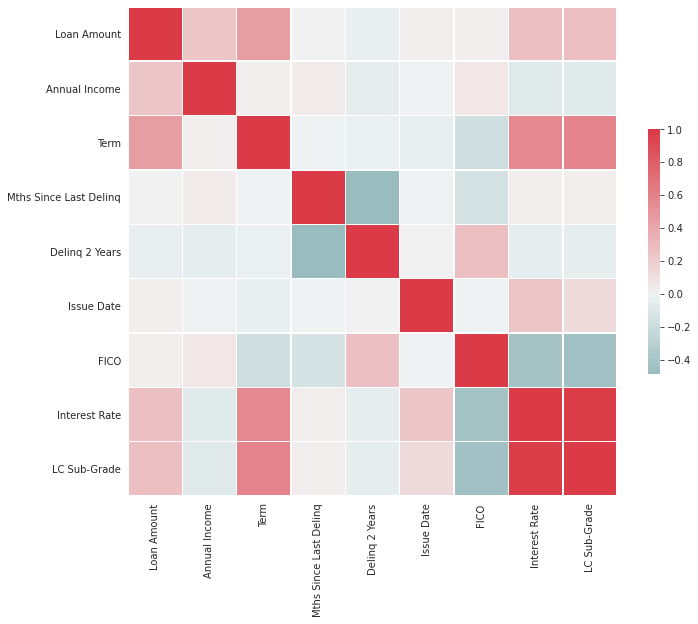

In [13]:
corr = nn_df_with_int_rate.corr()
corr.columns = ["Loan Amount", "Annual Income", "Term", "Mths Since Last Delinq", "Delinq 2 Years", "Issue Date", "FICO", "Interest Rate", "LC Sub-Grade"]
corr.index = corr.columns
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=None, vmax=1, center=0,
            square=True, linewidths=.5, cmap = cmap, cbar_kws={"shrink": .5})
plt.savefig(FIG_PATH + "shared_features_corr_matrix.pdf")

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(nn_df_with_int_rate.iloc[:, :-2], nn_df_with_int_rate.iloc[:, -1])

scaler = StandardScaler().fit(X_train)
normalized_X_train = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)

In [15]:
int_rate_corrs = (nn_df_with_int_rate.iloc[X_train.index, :].corr()['int_rate']).values[:-2]

In [16]:
num_neighbors = 5
nn = NearestNeighbors(n_neighbors = num_neighbors, metric = "mahalanobis", metric_params= {'V': np.diag(1/int_rate_corrs)*np.cov(normalized_X_train.T)*np.diag(1/int_rate_corrs)})

In [18]:
nn.fit(normalized_X_train)
X_train_neighbors = nn.kneighbors()
X_test_neighbors = nn.kneighbors(normalized_X_test)

In [19]:
# external_data = pd.read_csv(TEST_PATH + "eart_60m_clean.csv", index_col = 0)
# external_data.columns = ["loan_amnt", "fico", "drop", "annual_inc", "drop", "delinq_2yrs", "mths_since_last_delinq"]
# external_data.drop("drop", axis = 1, inplace= True)
# external_data["term"] = 1
# max_mths = nn_df_with_int_rate["mths_since_last_delinq"].max()
# external_data["mths_since_last_delinq"] = external_data["mths_since_last_delinq"].apply(lambda x: max_mths if x == -1 else x)
# external_data = external_data[external_data["fico"] > 660]
# external_data = external_data[["loan_amnt", "annual_inc", "term", "delinq_2yrs", "mths_since_last_delinq", "fico"]]
# external_data.head()

# normalized_ext = scaler.transform(external_data)
# ext_neighbors = nn.kneighbors(normalized_ext)

In [20]:
train_nearest_neighbor_sub_grades = nn_df_with_int_rate["sub_grade"].iloc[X_train.iloc[X_train_neighbors[1].flatten()].index]
test_nearest_neighbor_sub_grades = nn_df_with_int_rate["sub_grade"].iloc[X_train.iloc[X_test_neighbors[1].flatten()].index]

sub_grade_to_int_rate = {}
sub_grades = nn_df_with_int_rate["sub_grade"].unique()

for sub_grade in sub_grades:
    sub_grade_to_int_rate[sub_grade] = nn_df_with_int_rate["int_rate"][nn_df_with_int_rate["sub_grade"] == sub_grade].mean()

train_nearest_neighbor_int_rates = train_nearest_neighbor_sub_grades.apply(lambda x: sub_grade_to_int_rate[x])
test_nearest_neighbor_int_rates = test_nearest_neighbor_sub_grades.apply(lambda x: sub_grade_to_int_rate[x])

In [21]:
from scipy.special import softmax
train_nearest_neighbor_int_rates_weights = softmax(X_train_neighbors[0], axis = 1).flatten()
test_nearest_neighbor_int_rates_weights = softmax(X_test_neighbors[0], axis = 1).flatten()

In [22]:
train_weighted_int_rates = train_nearest_neighbor_int_rates * train_nearest_neighbor_int_rates_weights
test_weighted_int_rates = test_nearest_neighbor_int_rates * test_nearest_neighbor_int_rates_weights

In [23]:
train_weighted_int_rates = train_weighted_int_rates.values.reshape((-1, num_neighbors))
test_weighted_int_rates = test_weighted_int_rates.values.reshape((-1, num_neighbors))

train_pred_int_rate = np.sum(train_weighted_int_rates, axis = 1)
test_pred_int_rate = np.sum(test_weighted_int_rates, axis = 1)

In [24]:
# for_median = nearest_neighbor_sub_grades.values.reshape((-1, num_neighbors))
# median_subgrade = np.median(for_median, axis = 1)
# median_subgrade = median_subgrade.astype(int)
# pred_int_rate = pd.Series(median_subgrade).apply(lambda x: sub_grade_to_int_rate[x])

In [25]:
train_sub_grade_int_rate = y_train.apply(lambda x: sub_grade_to_int_rate[x])
test_sub_grade_int_rate = y_test.apply(lambda x: sub_grade_to_int_rate[x])

train_percent_diff = (train_pred_int_rate - train_sub_grade_int_rate) / train_sub_grade_int_rate
test_percent_diff = (test_pred_int_rate - test_sub_grade_int_rate) / test_sub_grade_int_rate


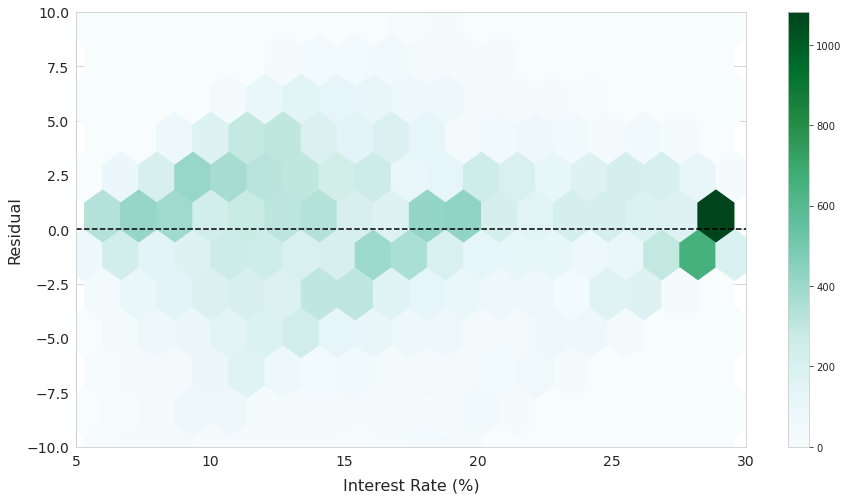

In [60]:
train_plotting_df = pd.DataFrame({'Interest Rate (%)': train_pred_int_rate,
                   'Residual': train_pred_int_rate - train_sub_grade_int_rate})
ax = train_plotting_df.plot.hexbin(x='Interest Rate (%)', y='Residual', ylim = [-10, 10], xlim = [5, 30], gridsize=18, figsize = (15, 8),sharex=False, fontsize = 14)
ax.set_xlabel("Interest Rate (%)", fontsize = 16, labelpad= 10)
ax.set_ylabel("Residual", fontsize = 16)
plt.axhline(y = 0, linestyle = "--", color = "k")
plt.savefig(FIG_PATH + "partition_subgrade_train_residual.pdf")

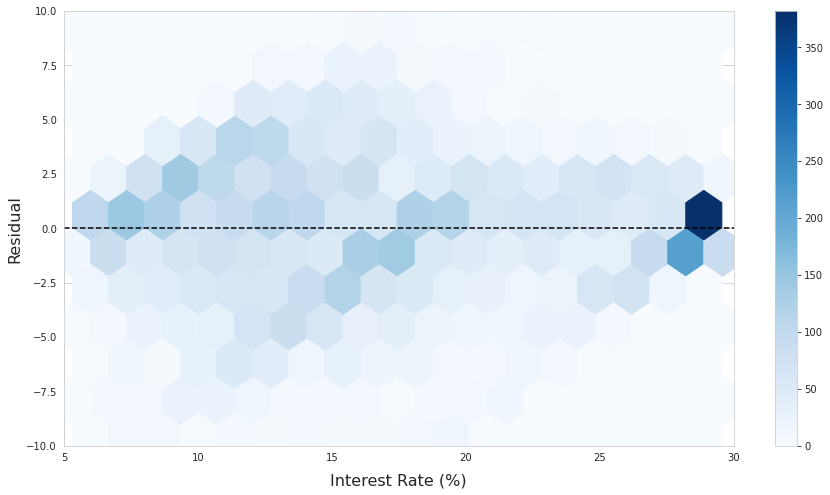

In [62]:
test_plotting_df = pd.DataFrame({'Interest Rate (%)': test_pred_int_rate,
                   'Residual': test_pred_int_rate - test_sub_grade_int_rate})
ax = test_plotting_df.plot.hexbin(x='Interest Rate (%)', y='Residual', ylim = [-10, 10], xlim = [5, 30], gridsize=18, figsize = (15, 8),sharex=False, cmap = "Blues")
ax.set_xlabel("Interest Rate (%)", fontsize = 16, labelpad= 10)
ax.set_ylabel("Residual", fontsize = 16)
plt.axhline(y = 0, linestyle = "--", color = "k")
plt.savefig(FIG_PATH + "partition_subgrade_test_residual.pdf")

In [28]:
from sklearn.metrics import r2_score, mean_squared_error
print(f"Train r^2: {r2_score(train_sub_grade_int_rate, train_pred_int_rate)}")
print(f"Test r^2: {r2_score(test_sub_grade_int_rate, test_pred_int_rate)}")
print(f"Train RMSE: {mean_squared_error(train_sub_grade_int_rate, train_pred_int_rate, squared= False)}")
print(f"Test RMSE: {mean_squared_error(test_sub_grade_int_rate, test_pred_int_rate, squared= False)}")


Train r^2: 0.7536442813553303
Test r^2: 0.7565198447879096
Train RMSE: 3.6162405981190187
Test RMSE: 3.6158526901224


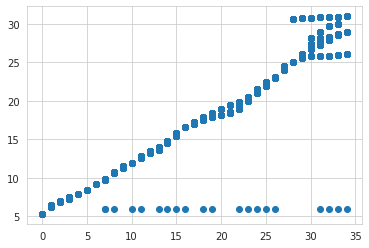

In [29]:
plt.scatter(nn_df_with_int_rate["sub_grade"], nn_df_with_int_rate["int_rate"])

### Fine-Tuning Using A Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

random_forest_regressor = RandomForestRegressor(max_depth = 100, min_samples_leaf=10, min_samples_split=5,
                      n_estimators=100)
linear_regressor = LinearRegression()

In [31]:
normalized_X = np.vstack((normalized_X_train, normalized_X_test))
pred_int_rate = np.hstack((train_pred_int_rate, test_pred_int_rate))
all_data = np.hstack((normalized_X, pred_int_rate.reshape((pred_int_rate.shape[0], 1))))
all_labels = np.hstack((y_train, y_test))

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_data, all_labels, test_size = 0.2, random_state = 0)

In [33]:
random_forest_regressor.fit(X_train, y_train)
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
# from sklearn.model_selection import GridSearchCV
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [25, 50, 75, 100],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# # Create a based model
# random_forest_regressor = RandomForestRegressor()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = random_forest_regressor, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 4)

# grid_search.fit(X_train, y_train)
# grid_search.best_params_

In [35]:
best_rf = random_forest_regressor

In [36]:
final_results = pd.DataFrame({"Actual": y_test,"Multi-Linear":linear_regressor.predict(X_test),
                              "Random Forest": best_rf.predict(X_test),
                              })

In [37]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

rf_rms = mean_squared_error(final_results['Actual'], final_results['Random Forest'], squared=False)

rf_rms_train = mean_squared_error(y_train, best_rf.predict(X_train), squared= False)
rf_r2 = r2_score(final_results['Actual'], final_results['Random Forest'])
rf_r2_train = r2_score(y_train, best_rf.predict(X_train))

lin_rms = mean_squared_error(final_results['Actual'], final_results['Multi-Linear'], squared=False)
lin_rms_train = mean_squared_error(y_train, linear_regressor.predict(X_train),  squared= False)
lin_r2 = r2_score(final_results['Actual'], final_results['Multi-Linear'])
lin_r2_train = r2_score(y_train, linear_regressor.predict(X_train))


In [38]:
rf_r2

0.8051452854702953

### Verifying Predictions Sufficiently Model Sub-Grade Classes

In [39]:
pred_int_rate = best_rf.predict(X_train)

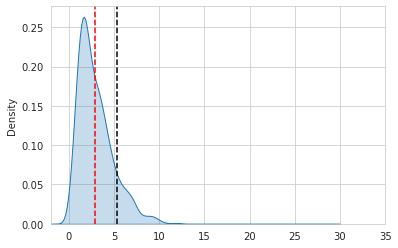

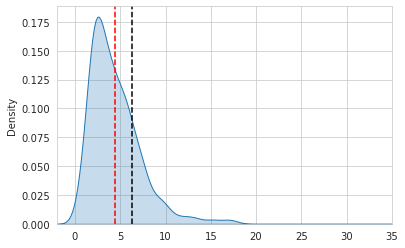

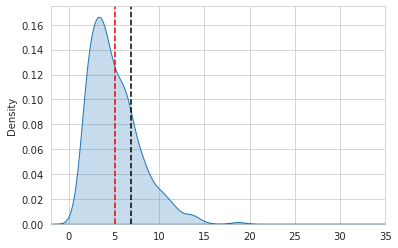

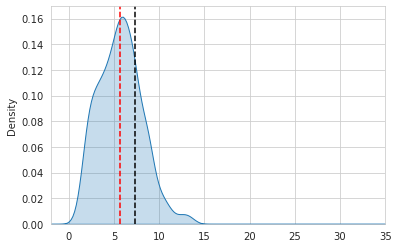

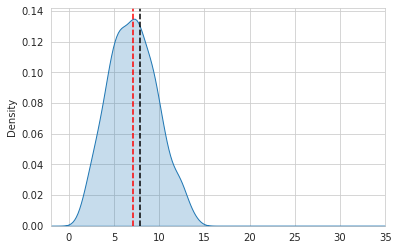

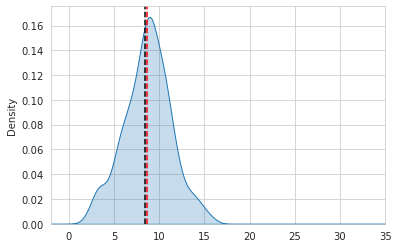

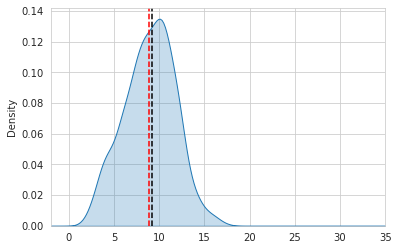

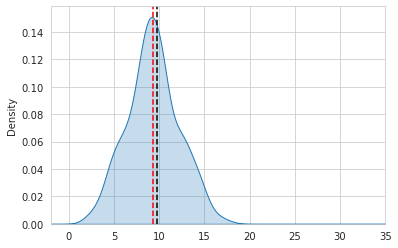

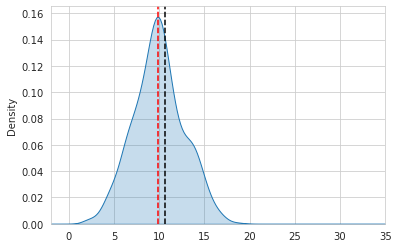

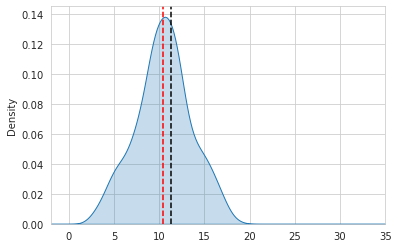

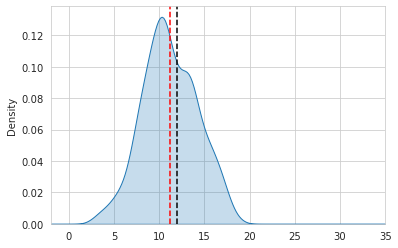

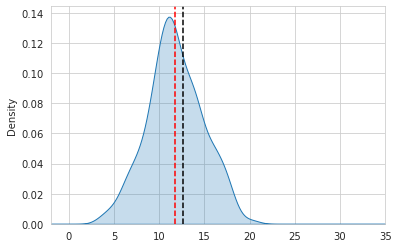

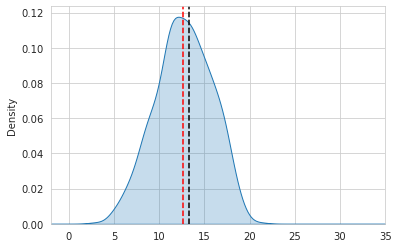

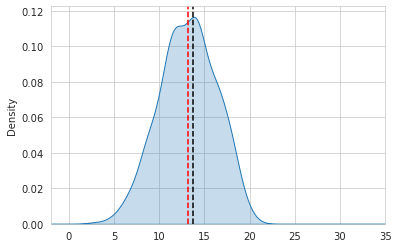

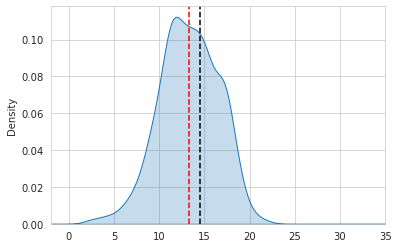

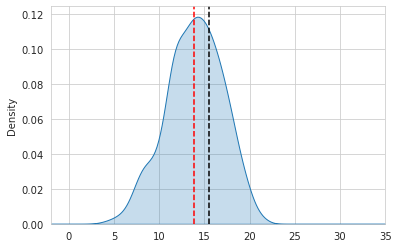

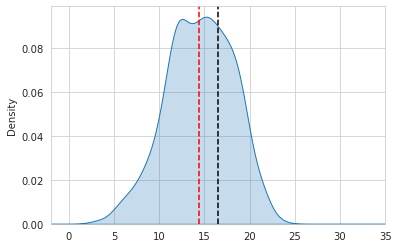

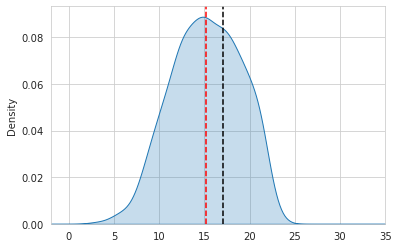

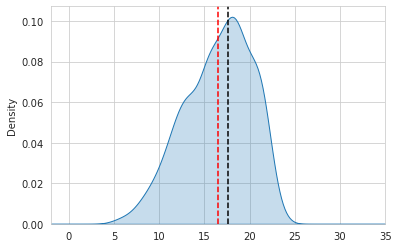

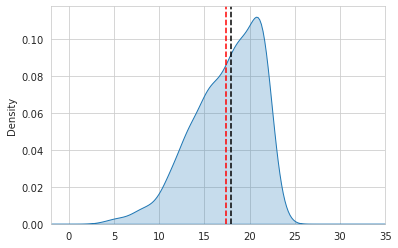

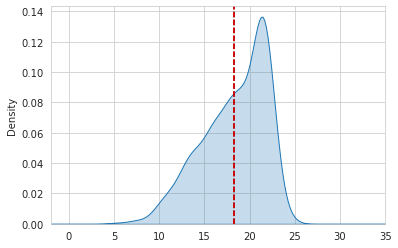

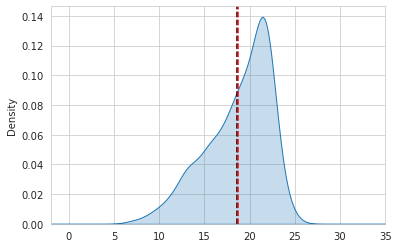

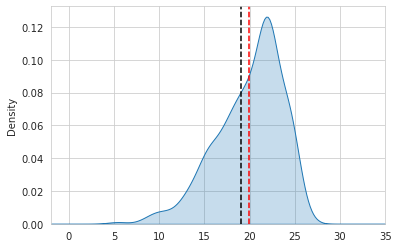

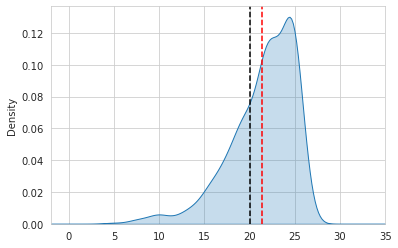

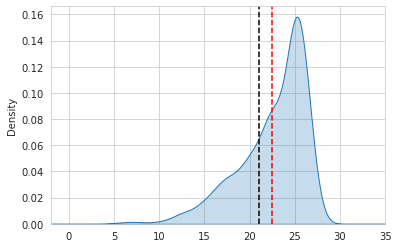

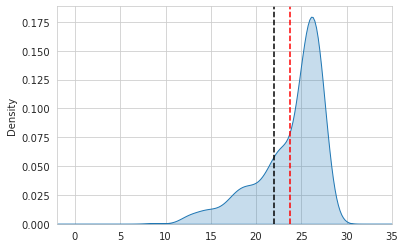

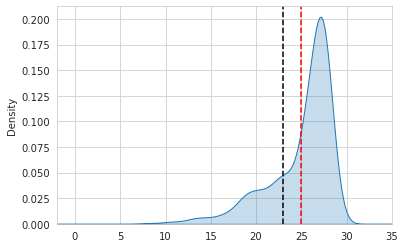

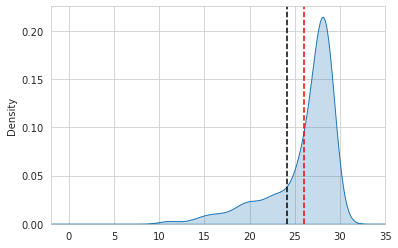

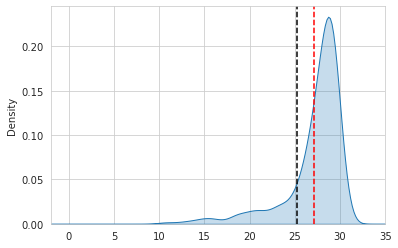

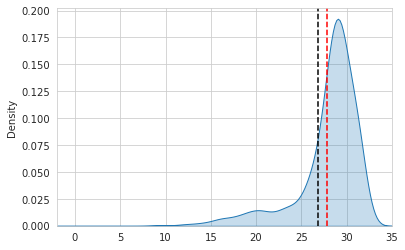

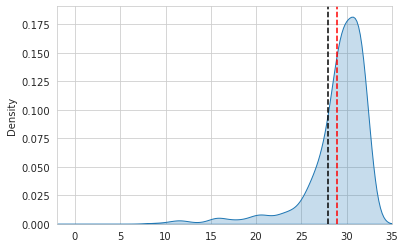

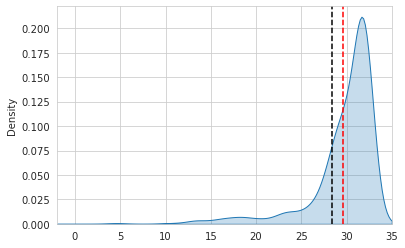

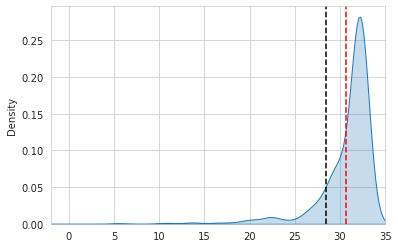

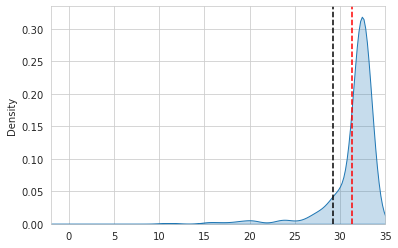

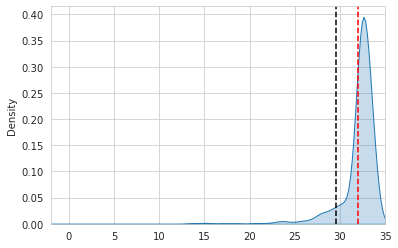

In [40]:
pred_int_rate = pd.Series(pred_int_rate)
xrange = np.linspace(-2, 35, 2000)
for i in range(35):
    ax = sns.kdeplot(pred_int_rate[y_train == i], cut = 35, clip = (-2, 35), fill = True)
    plt.xlim([-2, 35])
    # nn_df_reset_ind["int_rate"][nn_df_reset_ind["sub_grade"] == i].plot(kind = "kde")
    plt.axvline(x=sub_grade_to_int_rate[i], color='k', linestyle='--')
    plt.axvline(x=pred_int_rate[y_train == i].mean(), color = 'r', linestyle='--')
    plt.show()

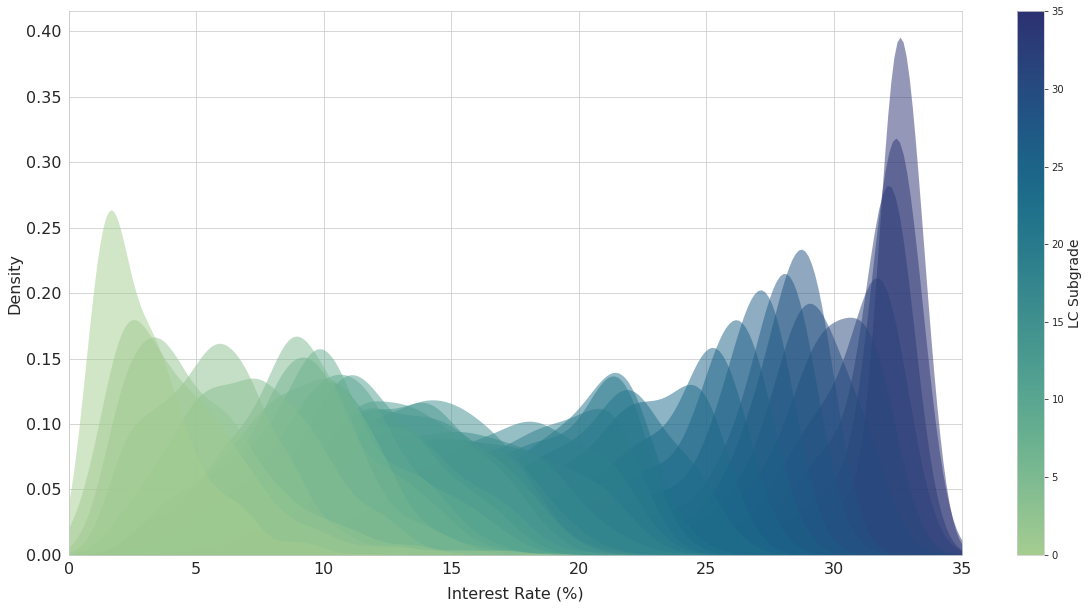

In [41]:
import matplotlib.cm
sub_grade_plotting_df = pd.DataFrame({"Interest Rate (%)": pred_int_rate, "LC Sub-Grade": y_train})

plt.figure(figsize=(20,10))
cmap = sns.color_palette("crest", as_cmap=True)
ax = sns.kdeplot(
   data=sub_grade_plotting_df, x="Interest Rate (%)", hue="LC Sub-Grade",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0
)
plt.tick_params(labelsize=16)
plt.xlabel("Interest Rate (%)", fontsize = 16, labelpad= 10)
plt.ylabel("Density", fontsize = 16)
plt.xlim(0, 35)
ax.legend([],[], frameon=False)
norm = matplotlib.colors.Normalize(vmin=0, vmax=35, clip=False)
cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label(label = "LC Subgrade", size=14)
plt.savefig(FIG_PATH + "partition_subgrade_pdfs_by_subgrade.pdf")

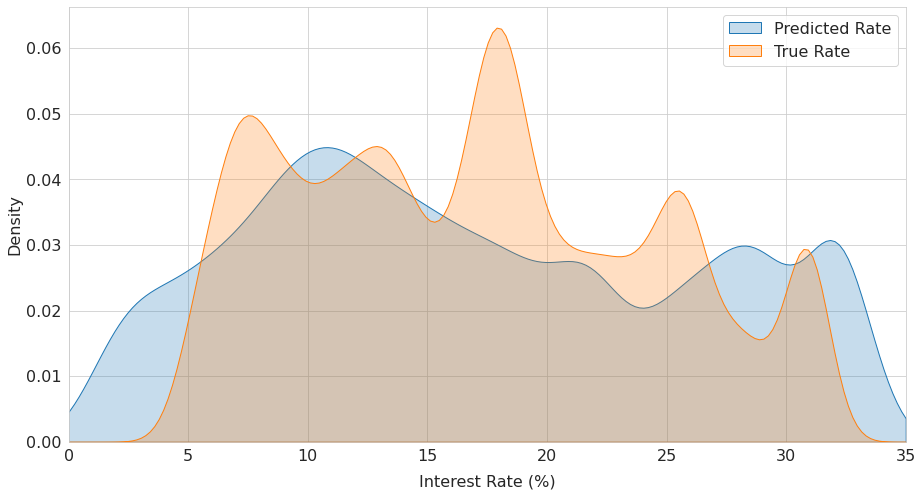

In [65]:
plt.figure(figsize=(15,8))
sns.kdeplot(pred_int_rate, cut = 35, clip = (-2, 35), fill = True, label = "Predicted Rate")
sns.kdeplot(nn_df_with_int_rate["int_rate"], cut = 35, clip = (-2, 35), fill = True, label = "True Rate")
plt.tick_params(labelsize=16)
plt.xlabel("Interest Rate (%)", fontsize = 16, labelpad= 10)
plt.ylabel("Density", fontsize = 16)
plt.legend(fontsize = 16)
plt.xlim(0, 35)
plt.savefig(FIG_PATH + "partition_subgrade_test_df_comp.pdf")

In [43]:
from sklearn.neighbors import KernelDensity

x_range = np.linspace(0, 35, 1000)
# instantiate and fit the KDE model
kde_pred = KernelDensity(bandwidth=0.8, kernel='gaussian')
kde_pred.fit(pred_int_rate.values.reshape((pred_int_rate.shape[0], 1)))
pred_logprob = kde_pred.score_samples(x_range.reshape((x_range.shape[0], 1)))

In [44]:
kde_act = KernelDensity(bandwidth=0.8, kernel='gaussian')
kde_act.fit(nn_df_with_int_rate["int_rate"].values.reshape((nn_df_with_int_rate["int_rate"].shape[0], 1)))
act_logprob = kde_act.score_samples(x_range.reshape((x_range.shape[0], 1)))

In [45]:
from scipy.integrate import trapz

BC = trapz(x = x_range, y=np.sqrt(np.exp(pred_logprob)*np.exp(act_logprob)))
BC

0.9391024655674605